# Advanced Dataframes

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

1. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [2]:
def get_db_url(user, host, password, db_name):
    """
    Order is important!! make sure you enter user, host, password, and then the name of the database you want to access
    """
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url
    

2. Use your function to obtain a connection to the employees database.

In [3]:
from env import host, user, password
db_name = 'employees'
url = get_db_url(user, host, password, db_name)

In [4]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


3. Once you have successfully run a query:

- a. Intentionally make a typo in the database url. What kind of error message do you see?

    - OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'florence12'@'%' to database 'employes'")
(Background on this error at: http://sqlalche.me/e/13/e3q8)

- b. Intentionally make an error in your SQL query. What does the error message look like?
    - ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '5 OFFSET 50' at line 1")

4. Read the employees and titles tables into two separate DataFrames.

In [5]:
employees_df = pd.read_sql(
'''
SELECT * FROM employees
''',
url)

In [6]:
titles_df = pd.read_sql(
'''
SELECT * FROM titles
''',
url)

5. How many rows and columns do you have in each DataFrame? Is that what you expected?

In [7]:
# 300024 rows x 6 columns in employees
employees_df.shape

(300024, 6)

In [8]:
#443308 rows x 4 columns in titles
titles_df.shape

(443308, 4)

6. Display the summary statistics for each DataFrame.

In [9]:
employees_df.describe(exclude = np.number)

,birth_date,first_name,last_name,gender,hire_date
count,300024,300024,300024,300024,300024
unique,4750,1275,1637,2,5434
top,1952-03-08,Shahab,Baba,M,1985-06-20
freq,95,295,226,179973,132


In [10]:
titles_df.describe(exclude = np.number)

,title,from_date,to_date
count,443308,443308,443308
unique,7,6393,5888
top,Engineer,1998-10-25,9999-01-01
freq,115003,132,240124


7. How many unique titles are in the titles DataFrame?

In [11]:
#find unique values in the titles column
titles_df.title.unique()

#find type of this output - its a numpy array
type(titles_df.title.unique())

#use shape to figure out how many values are in there
titles_df.title.unique().shape

(7,)

8. What is the oldest date in the to_date column?

In [12]:
# little tester to see what the df looks like 
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [13]:
titles_df.to_date.sort_values().head(1) #inital way, sort the values and get the top one

16064    1985-03-01
Name: to_date, dtype: object

In [14]:
titles_df.to_date.min() #wizard way

datetime.date(1985, 3, 1)

In [15]:
min(titles_df['to_date']) #another wizard way

datetime.date(1985, 3, 1)

In [16]:
type(min(titles_df['to_date'])) 

datetime.date

9. What is the most recent date in the to_date column?

In [17]:
titles_df.to_date.max()

datetime.date(9999, 1, 1)

# Exercises II
1. Copy the users and roles DataFrames from the examples above.

2. What is the result of using a right join on the DataFrames?

3. What is the result of using an outer join on the DataFrames?

4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

5. Load the mpg dataset from PyDataset.

6. Output and read the documentation for the mpg dataset.

7. How many rows and columns are in the dataset?

8. Check out your column names and perform any cleanup you may want on them.

9. Display the summary statistics for the dataset.

10. How many different manufacturers are there?

11. How many different models are there?

12. Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

13. Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

14. Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

15. Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

16. Do automatic or manual cars have better miles per gallon?

1. Copy the users and roles DataFrames from the examples above.

In [18]:
#create users dataframe
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
#create roles dataframe
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

2. What is the result of using a right join on the DataFrames?

In [19]:
# it only shows the values on the roles table. so if there's a value on the left table that 
# doesn't have a corresponding value on the right table it's not included in the join
users.merge(roles, left_on='role_id', right_on='id', how='right', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


3. What is the result of using an outer join on the DataFrames?

In [20]:
# it shows all the rows for both data sets 
users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [22]:
# it gives you a key error because the foreign key NEEDS to be there so the tables can reference eachother
# also there's only one foreign key. role_id on the users table. 

# users.drop(columns='role_id').merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

5. Load the mpg dataset from PyDataset.

In [23]:
mpg = data('mpg')

6. Output and read the documentation for the mpg dataset.

In [24]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




7. How many rows and columns are in the dataset?

In [25]:
#234 rows and 11 columns
mpg.shape

(234, 11)

8. Check out your column names and perform any cleanup you may want on them.

In [26]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


fl column is Fuel Type

e: ethanol E85, note(subset(mpg, fl=="e") pulls up only "new" american cars, and that fuel economy is much lower than the corresponding presumably gasoline models, which lines up with the lower energy content of ethanol)

d: diesel

r: regular

p: premium

c: CNG (note as far as I know the civic is basically the only passenger car that runs on CNG 
in the US).

In [27]:
mpg = mpg.rename(columns = {'cty': 'city_mpg', 
                      'hwy': 'highway_mpg', 
                      'fl': 'fuel_type', 
                      'drv': 'drive', 
                      'displ': 'engine_displ_L'})
mpg

,manufacturer,model,engine_displ_L,year,cyl,trans,drive,city_mpg,highway_mpg,fuel_type,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


9. Display the summary statistics for the dataset.

In [28]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_displ_L,234.0,3.471795,1.291959,1.6,2.4,3.3,4.6,7.0
year,234.0,2003.500000,4.509646,1999.0,1999.0,2003.5,2008.0,2008.0
cyl,234.0,5.888889,1.611534,4.0,4.0,6.0,8.0,8.0
city_mpg,234.0,16.858974,4.255946,9.0,14.0,17.0,19.0,35.0
highway_mpg,234.0,23.440171,5.954643,12.0,18.0,24.0,27.0,44.0


10. How many different manufacturers are there?

In [29]:
#two different ways
mpg.manufacturer.agg('nunique')

mpg.manufacturer.nunique()

15

11. How many different models are there?

In [30]:
mpg.model.nunique()

38

12. Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [31]:
mpg['mileage_difference'] = mpg['highway_mpg'] - mpg['city_mpg']
mpg.head()

,manufacturer,model,engine_displ_L,year,cyl,trans,drive,city_mpg,highway_mpg,fuel_type,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


13. Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [32]:
mpg['average_mileage'] = (mpg.city_mpg + mpg.highway_mpg) / 2

mpg.head()

,manufacturer,model,engine_displ_L,year,cyl,trans,drive,city_mpg,highway_mpg,fuel_type,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


In [33]:
# OR alternate method using the mean function
mpg['average_mileage'] = mpg[['highway_mpg', 'city_mpg']].mean(axis = 1)
mpg.head()

,manufacturer,model,engine_displ_L,year,cyl,trans,drive,city_mpg,highway_mpg,fuel_type,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


14. Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

In [34]:
# look at pandas series exercises we did this with berry (using count and contains)
mpg['is_automatic'] = np.where(mpg.trans.str.contains('auto'), True, False)
mpg

,manufacturer,model,engine_displ_L,year,cyl,trans,drive,city_mpg,highway_mpg,fuel_type,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [35]:
# you can use assign to create multiple columns at once
# seperate functions with , 
# mpg.assign(mileage_difference = mpg.highway - mpg.city,
#                  average_mileage = (mpg.highway + mpg.city) / 2,
#                  is_automatic = mpg.transmission.str.startswith('a'))

15. Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average? - Honda with 28.5 mpg on average

In [36]:
# SELECT mean(avg_mileage), manufacturer
# FROM mpg
# GROUP BY manufacturer
# ORDER BY mean(avg_mileage) desc

manufacturer_mpg_avgs = mpg.groupby('manufacturer').average_mileage.agg('mean').sort_values(ascending = False)
manufacturer_mpg_avgs

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
toyota        21.720588
pontiac       21.700000
nissan        21.346154
chevrolet     18.447368
ford          16.680000
mercury       15.625000
jeep          15.562500
dodge         15.540541
lincoln       14.166667
land rover    14.000000
Name: average_mileage, dtype: float64

### Findings
- Honda has the best mpg with an average of 28.5mpg accross all their cars

16. Do automatic or manual cars have better miles per gallon?

In [37]:
mpg.groupby('is_automatic').average_mileage.agg('mean')

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

### Findings: 
- Manual cars have a slightly better overall gas milage of 22.2 mpg, and automatic cars have an average of 19.1 mpg

In [38]:
mpg

,manufacturer,model,engine_displ_L,year,cyl,trans,drive,city_mpg,highway_mpg,fuel_type,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [39]:
mpg.groupby('manufacturer').count()

,model,engine_displ_L,year,cyl,trans,drive,city_mpg,highway_mpg,fuel_type,class,mileage_difference,average_mileage,is_automatic
manufacturer,,,,,,,,,,,,,
audi,18,18,18,18,18,18,18,18,18,18,18,18,18
chevrolet,19,19,19,19,19,19,19,19,19,19,19,19,19
dodge,37,37,37,37,37,37,37,37,37,37,37,37,37
ford,25,25,25,25,25,25,25,25,25,25,25,25,25
honda,9,9,9,9,9,9,9,9,9,9,9,9,9
hyundai,14,14,14,14,14,14,14,14,14,14,14,14,14
jeep,8,8,8,8,8,8,8,8,8,8,8,8,8
land rover,4,4,4,4,4,4,4,4,4,4,4,4,4
lincoln,3,3,3,3,3,3,3,3,3,3,3,3,3


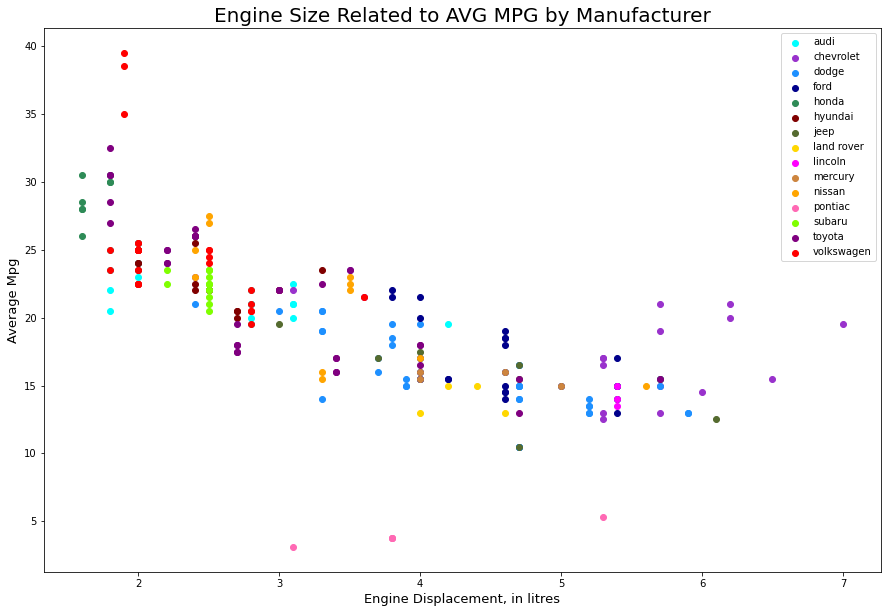

In [40]:
# Graph size of engine (displ) on x axis, and avg mpg 
xaudi = mpg[mpg['manufacturer'] == 'audi'].engine_displ_L.array
yaudi = mpg[mpg['manufacturer'] == 'audi'].average_mileage.array

xchevrolet = mpg[mpg['manufacturer'] == 'chevrolet'].engine_displ_L.array
ychevrolet = mpg[mpg['manufacturer'] == 'chevrolet'].average_mileage.array

xdodge = mpg[mpg['manufacturer'] == 'dodge'].engine_displ_L.array
ydodge = mpg[mpg['manufacturer'] == 'dodge'].average_mileage.array

xford = mpg[mpg['manufacturer'] == 'ford'].engine_displ_L.array
yford = mpg[mpg['manufacturer'] == 'ford'].average_mileage.array

xhonda = mpg[mpg['manufacturer'] == 'honda'].engine_displ_L.array
yhonda = mpg[mpg['manufacturer'] == 'honda'].average_mileage.array

xhyundai = mpg[mpg['manufacturer'] == 'hyundai'].engine_displ_L.array
yhyundai = mpg[mpg['manufacturer'] == 'hyundai'].average_mileage.array

xjeep = mpg[mpg['manufacturer'] == 'jeep'].engine_displ_L.array
yjeep = mpg[mpg['manufacturer'] == 'jeep'].average_mileage.array

xland_rover = mpg[mpg['manufacturer'] == 'land rover'].engine_displ_L.array
yland_rover = mpg[mpg['manufacturer'] == 'land rover'].average_mileage.array

xlincoln = mpg[mpg['manufacturer'] == 'lincoln'].engine_displ_L.array
ylincoln = mpg[mpg['manufacturer'] == 'lincoln'].average_mileage.array

xmercury = mpg[mpg['manufacturer'] == 'mercury'].engine_displ_L.array
ymercury = mpg[mpg['manufacturer'] == 'mercury'].average_mileage.array

xnissan = mpg[mpg['manufacturer'] == 'nissan'].engine_displ_L.array
ynissan = mpg[mpg['manufacturer'] == 'nissan'].average_mileage.array

xpontiac = mpg[mpg['manufacturer'] == 'pontiac'].engine_displ_L.array
ypontiac = mpg[mpg['manufacturer'] == 'pontiac'].average_mileage.array

xsubaru = mpg[mpg['manufacturer'] == 'subaru'].engine_displ_L.array
ysubaru = mpg[mpg['manufacturer'] == 'subaru'].average_mileage.array

xtoyota = mpg[mpg['manufacturer'] == 'toyota'].engine_displ_L.array
ytoyota = mpg[mpg['manufacturer'] == 'toyota'].average_mileage.array

xvolkswagen = mpg[mpg['manufacturer'] == 'volkswagen'].engine_displ_L.array
yvolkswagen = mpg[mpg['manufacturer'] == 'volkswagen'].average_mileage.array

plt.figure(figsize = (15,10))
plt.scatter(xaudi, yaudi, label = 'audi', c = 'aqua')
plt.scatter(xchevrolet, ychevrolet, label = 'chevrolet', c = 'darkorchid')
plt.scatter(xdodge, ydodge, label = 'dodge', c = 'dodgerblue')
plt.scatter(xford, yford, label = 'ford', c = 'darkblue')
plt.scatter(xhonda, yhonda, label = 'honda', c = 'seagreen')
plt.scatter(xhyundai, yhyundai, label = 'hyundai', c = 'maroon')
plt.scatter(xjeep, yjeep, label = 'jeep', c = 'darkolivegreen')
plt.scatter(xland_rover, yland_rover, label = 'land rover', c = 'gold')
plt.scatter(xlincoln, ylincoln, label = 'lincoln', c = 'magenta')
plt.scatter(xmercury, ymercury, label = 'mercury', c = 'peru')
plt.scatter(xnissan, ynissan, label = 'nissan', c = 'orange')
plt.scatter(xpontiac, xpontiac, label = 'pontiac', c = 'hotpink')
plt.scatter(xsubaru, ysubaru, label = 'subaru', c = 'chartreuse')
plt.scatter(xtoyota, ytoyota, label = 'toyota', c = 'purple')
plt.scatter(xvolkswagen, yvolkswagen, label = 'volkswagen', c = 'red')

plt.title('Engine Size Related to AVG MPG by Manufacturer', size = 20)
plt.legend(loc = 'best')
plt.xlabel('Engine Displacement, in litres', size = 13)
plt.ylabel('Average Mpg', size = 13)

plt.show()

<AxesSubplot:xlabel='is_automatic,year'>

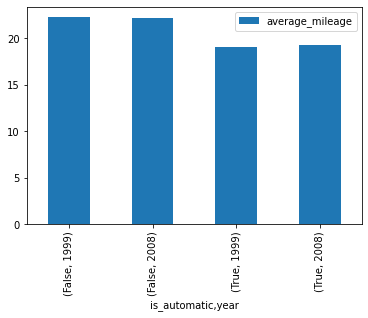

In [41]:
# line graph comparing average mpg accross manufacturers, over time (yr) 
# x axis is years
# y axis is avg mpg 
# 15 lines
# break it down and start with one line 

# Get x values (years)
# get y values (mpg avg year)

year_avg_mpg = pd.DataFrame(mpg.groupby(['is_automatic', 'year']).average_mileage.mean())
year_avg_mpg.plot.bar()

In [42]:
mpg.groupby(['is_automatic', 'year']).average_mileage.mean()

is_automatic  year
False         1999    22.255814
              2008    22.191176
True          1999    19.040541
              2008    19.210843
Name: average_mileage, dtype: float64

### Findings
- no data for years in between 1999 and 2008 so my original goal won't work 
- There is no significant difference between mpg averages between years
- there was a small (.2 mpg increase) increase in average mpgs for automatic cars between 1999 and 2008
- There was a small (.1 mpg decrease) decrease in average mpgs for manual cars between 1999 and 2008


# Exercises III
1. Use your get_db_url function to help you explore the data from the chipotle database.

2. What is the total price for each order?

3. What are the most popular 3 items?

4. Which item has produced the most revenue?

5. Using the titles DataFrame, visualize the number of employees with each title.

6. Join the employees and titles DataFrames together.

7. Visualize how frequently employees change titles.

8. For each title, find the hire date of the employee that was hired most recently with that title.

9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)



1. Use your get_db_url function to help you explore the data from the chipotle database.

In [43]:
url = get_db_url(user, host, password,'chipotle')
pd.read_sql('SELECT * FROM orders LIMIT 5', url)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [44]:
chipotle_df = pd.read_sql('SELECT * FROM orders', url)

2. What is the total price for each order?

In [45]:
chipotle_df.info()
#item price is an object. Must convert to float. STRING MONEY FLOAT! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [46]:
#get rid of dollar sign in itme_price column and change the type to a float
chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '').astype(float)

In [47]:
#the variable order_total_prices has all 
order_total_prices = chipotle_df.groupby('order_id').item_price.sum()
order_total_prices

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

3. What are the most popular 3 items?

In [48]:
# this does not account for the quantity of items ordered in the quantity column 
# chicken bowl is most frequent with 726 mentions 

chipotle_df['item_name'].value_counts().head(3)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: item_name, dtype: int64

4. Which item has produced the most revenue?

In [49]:
# group by item name, sum all the prices together, and use the nlargest to get the highest one
chipotle_df.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

5. Using the titles DataFrame, visualize the number of employees with each title.

In [66]:
# this is a representation of all titles ever held by any employee ever. 
# if an employee has had multiple titles over their tenure, they appear in the count
titles_df['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

<AxesSubplot:title={'center':'Title number breakdown'}, xlabel='Job Title', ylabel='Title Count'>

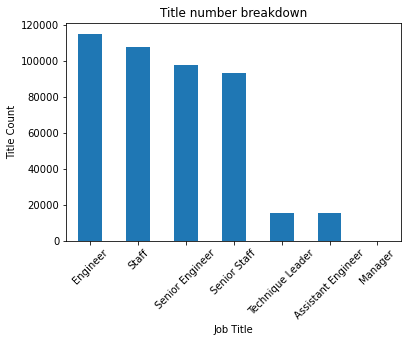

In [67]:
titles_df['title'].value_counts().plot.bar(rot = 45, title = 'Title number breakdown', xlabel = "Job Title", ylabel = 'Title Count')

6. Join the employees and titles DataFrames together.

In [51]:
employees_titles_df = employees_df.merge(titles_df, how = 'inner', on = 'emp_no')
employees_titles_df.head(20)

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
5,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01
6,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Staff,1989-09-12,1996-09-12
7,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,1990-08-05,9999-01-01
8,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Senior Staff,1996-02-11,9999-01-01
9,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Staff,1989-02-10,1996-02-11


7. Visualize how frequently employees change titles.

In [52]:
employees_df.shape

(300024, 6)

In [59]:
titlescounts = employees_titles_df.groupby('emp_no').title.count()

<AxesSubplot:xlabel='Number of Jobs Held by a Single Employee', ylabel='Number of employees'>

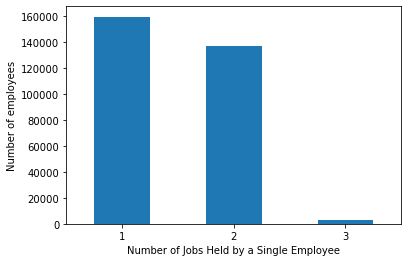

In [72]:
titlescounts.value_counts().plot.bar(rot = 0, xlabel = 'Number of Jobs Held by a Single Employee', ylabel = 'Number of employees')


8. For each title, find the hire date of the employee that was hired most recently with that title.

In [100]:
employees_titles_df.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [102]:
empurl = get_db_url(user, host, password, 'employees')

In [108]:
# my sql query that brings over all the department names and the titles.
# Joinis the titles table, to dept_emp table to get all employees with those titles
# join departments table to get the name of the department
title_count_df = pd.read_sql(
    '''
    SELECT 
    d.dept_name AS dept_name, 
    t.title AS title
    FROM titles AS t
    JOIN `dept_emp` AS de USING (emp_no)
    JOIN `departments` AS d ON d.`dept_no` = de.`dept_no`
    ORDER BY d.dept_name, t.title;
    ''', empurl)

In [110]:
# use crosstab function to count all job titles per department
pd.crosstab(title_count_df.dept_name, title_count_df.title, margins = True)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
dept_name,,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309,35075
Development,7769,58135,2,49326,1247,1424,7683,125586
Finance,0,0,2,0,12139,13929,0,26070
Human Resources,0,0,2,0,12274,14342,0,26618
Marketing,0,0,2,0,13940,16196,0,30138
Production,6445,49649,4,42205,1270,1478,6557,107608
Quality Management,1831,13852,4,11864,0,0,1795,29346
Research,378,2986,2,2570,11637,13495,393,31461
Sales,0,0,2,0,36191,41808,0,78001


In [113]:
# cross tab function with percentages
pd.crosstab(title_count_df.dept_name, title_count_df.title, normalize = True, margins = True).round(4)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
dept_name,,,,,,,,
Customer Service,0.0006,0.0048,0.0,0.0041,0.0284,0.0330,0.0006,0.0716
Development,0.0159,0.1187,0.0,0.1007,0.0025,0.0029,0.0157,0.2563
Finance,0.0000,0.0000,0.0,0.0000,0.0248,0.0284,0.0000,0.0532
Human Resources,0.0000,0.0000,0.0,0.0000,0.0251,0.0293,0.0000,0.0543
Marketing,0.0000,0.0000,0.0,0.0000,0.0285,0.0331,0.0000,0.0615
Production,0.0132,0.1013,0.0,0.0861,0.0026,0.0030,0.0134,0.2197
Quality Management,0.0037,0.0283,0.0,0.0242,0.0000,0.0000,0.0037,0.0599
Research,0.0008,0.0061,0.0,0.0052,0.0238,0.0275,0.0008,0.0642
Sales,0.0000,0.0000,0.0,0.0000,0.0739,0.0853,0.0000,0.1592
